# 1- importing the libraries 


In [30]:
#Importing pandas and numpy for data manpulation 
import pandas as pd 
import numpy as np 

#Importing matplot and seaborn for data visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

#Importing sickit leran for machine learning and model selection 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#  2- EDA


In [31]:
#Loading and displaying the data
df = pd.read_csv('BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704


We can see that: 

-Data contains 2713 rows and 7 columns.

-The all data is numerical except the date.

-The date starts from "2014-09-17" until "2022-02-19". 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


The data contains:

-7 features  (5 floating values , 1 integer , 1 object (that should be datetime value)). 

-Also there is no missing values in the dataset. 

In [33]:
#Data statistics description   
df.describe(include = 'all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,2713,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
unique,2713,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,NaN,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,NaN,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,NaN,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,NaN,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,NaN,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10


The data is scaled unless we use the 'Volume' column



In [34]:
#chceking for any missing values 
df.isna().apply(pd.value_counts) 

,Date,Open,High,Low,Close,Adj Close,Volume
False,2713,2713,2713,2713,2713,2713,2713


### 3- Data preprocessing and time series analysis

In [35]:
#setting the date column as index to preform time series analysis 
df.set_index('Date',inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813


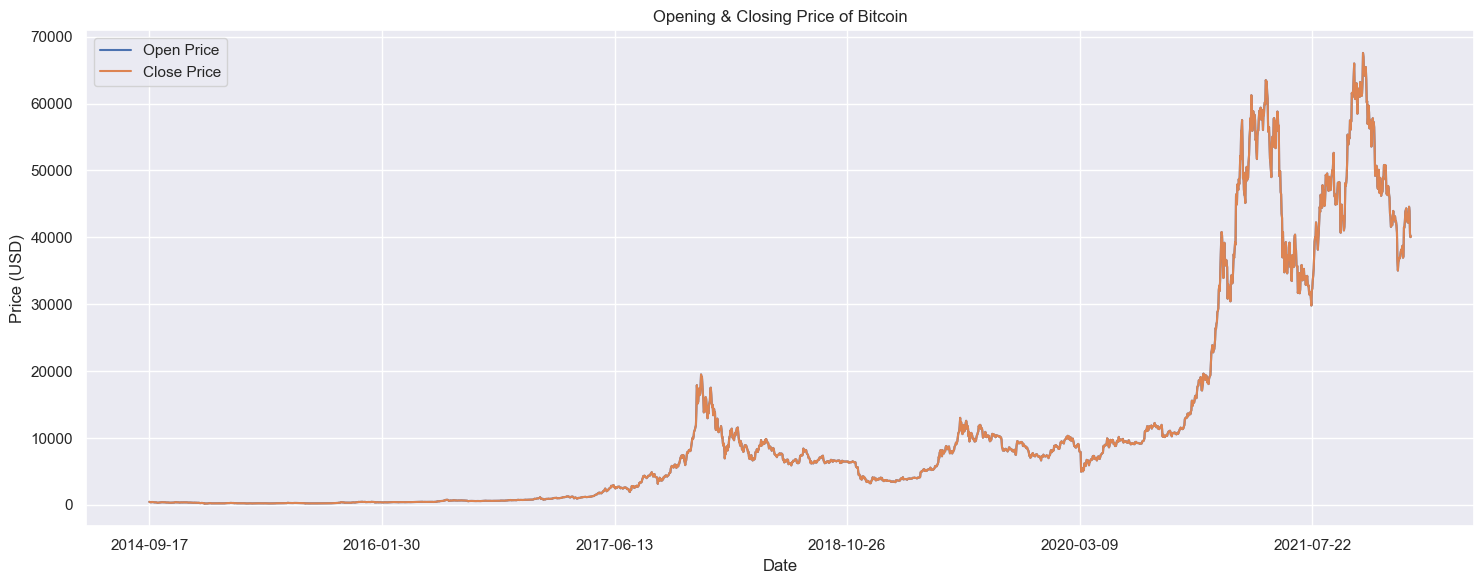

In [36]:
# Plot the 'adj close' and 'Close' prices
plt.figure(figsize=(15, 6))
df['Adj Close'].plot()
df['Close'].plot()
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.title('Opening & Closing Price of Bitcoin')
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()


In [37]:
#Checking between the shape of the two columns 
df[df['Close'] == df['Adj Close']].shape, df.shape


((2713, 6), (2713, 6))

In [38]:
#dropping uncessary columns 
df.drop(['Adj Close','Volume'], axis=1, inplace=True)
df

,Open,High,Low,Close
Date,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002
2014-09-19,424.102997,427.834991,384.532013,394.795990
2014-09-20,394.673004,423.295990,389.882996,408.903992
2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125
2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375
2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719


Date range in the dataset: 2014-09-17 to 2022-02-19


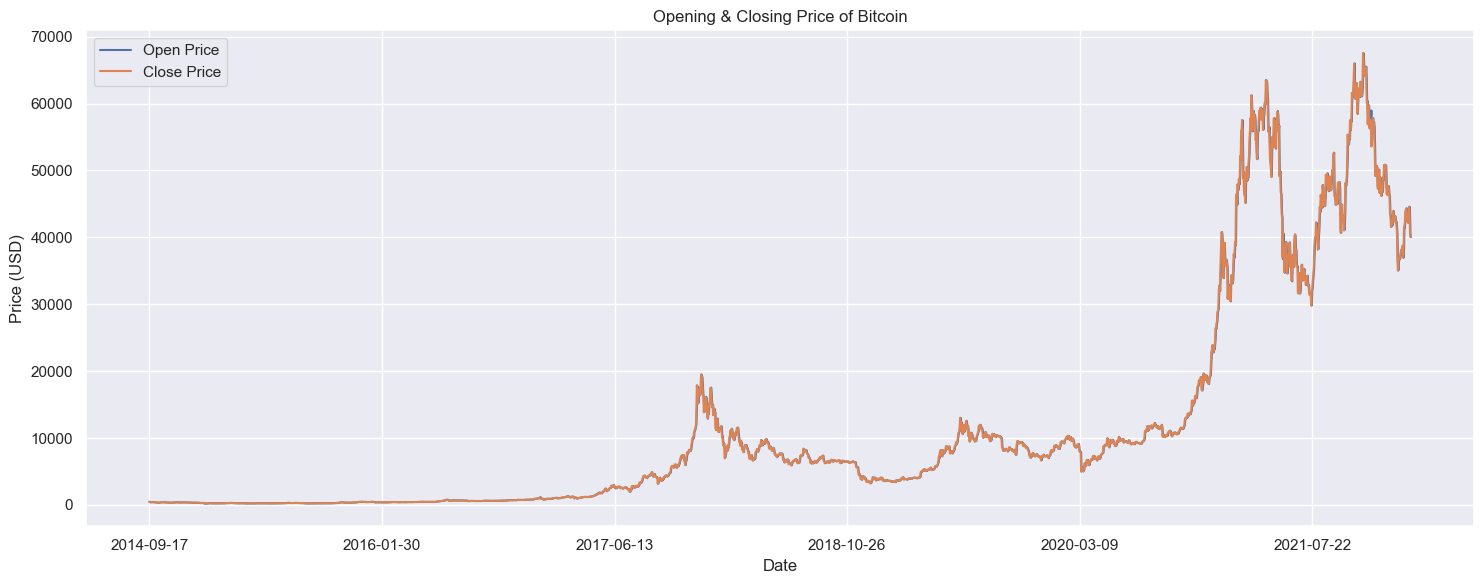

In [39]:
# Verify the range of the data
print("Date range in the dataset:", df.index.min(), "to", df.index.max())

# Use seaborn style
sns.set(style="darkgrid")

# Plot the 'Open' and 'Close' prices
plt.figure(figsize=(15, 6))
df['Open'].plot()
df['Close'].plot()
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.title('Opening & Closing Price of Bitcoin')
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

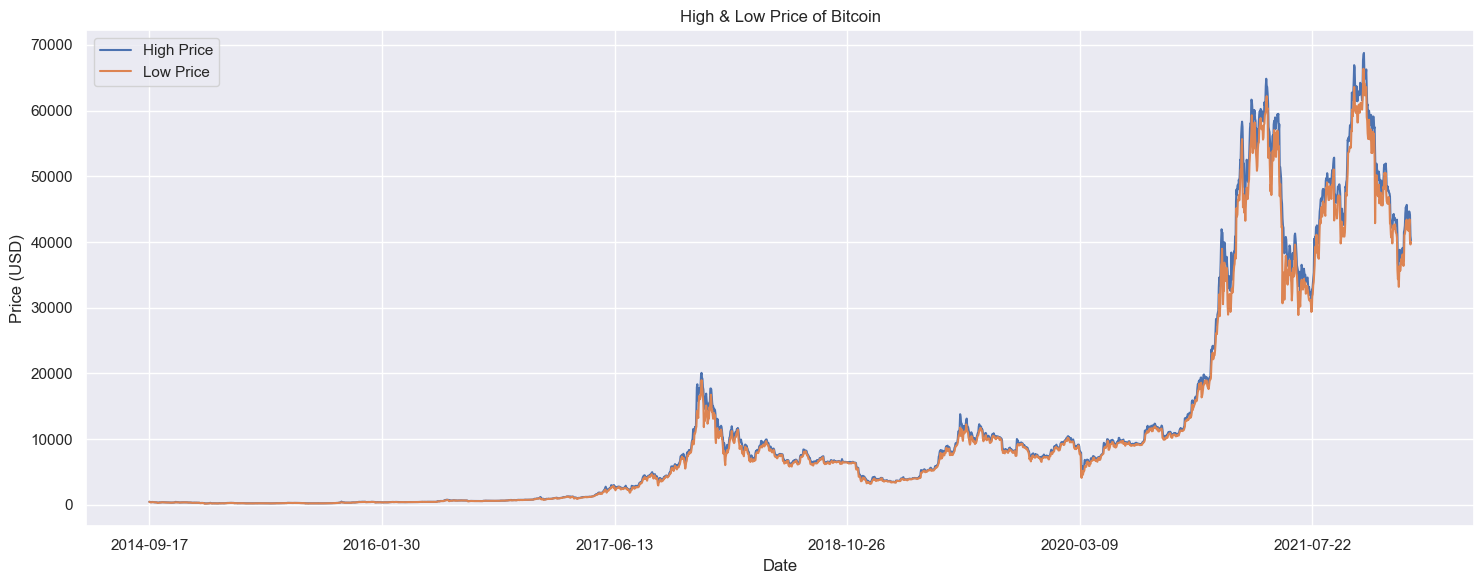

In [40]:
# Plot the 'High' and 'Low' prices
plt.figure(figsize=(15, 6))
df['High'].plot()
df['Low'].plot()
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.title('High & Low Price of Bitcoin')
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

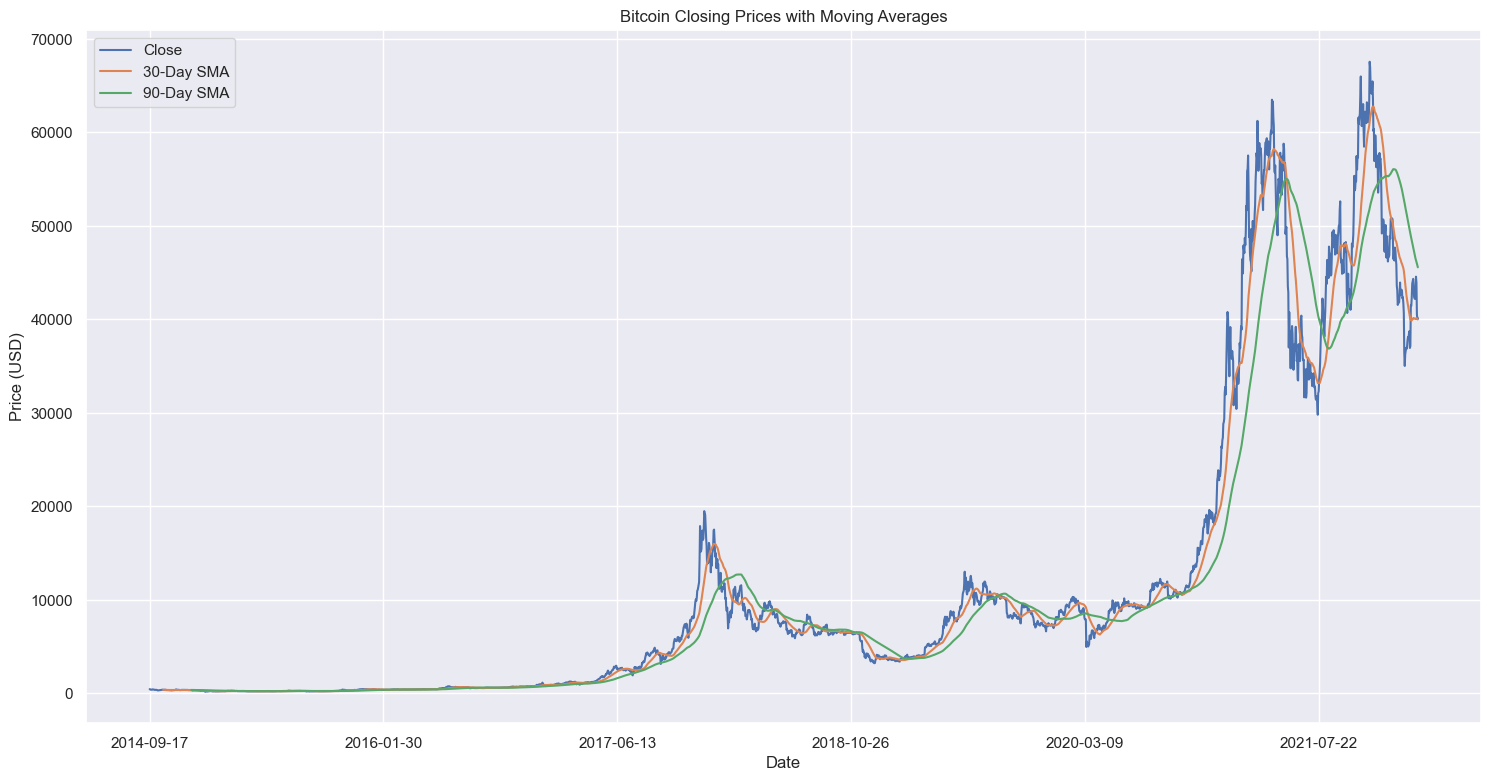

In [41]:
# Moving Average
df['SMA_30'] = df['Close'].rolling(window=30).mean()
df['SMA_90'] = df['Close'].rolling(window=90).mean()
plt.figure(figsize=(18, 9))
df['Close'].plot(label='Close')
df['SMA_30'].plot(label='30-Day SMA')
df['SMA_90'].plot(label='90-Day SMA')
plt.title('Bitcoin Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [42]:
df['Daily_Return'] = df['Close'].diff()

In [43]:
df['Volatility'] = df['Close'].rolling(window=7).std()


In [44]:
df['SMA_30'] = df['Close'].rolling(window=30).mean()


In [45]:
# Normalizing the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Close', 'High', 'Low', 'Open', 'Daily_Return', 'Volatility', 'SMA_30']])


In [46]:
# Create a DataFrame for the scaled data
df_scaled = pd.DataFrame(df_scaled, columns=['Close', 'High', 'Low', 'Open', 'Daily_Return', 'Volatility', 'SMA_30'], index=df.index)

In [47]:
# Creating lagged features
def create_lagged_features(data, lags=1):
    for lag in range(1, lags + 1):
        data[f'Close_Lag_{lag}'] = data['Close'].shift(lag)
    return data



In [48]:
# Applying the function to create lagged features
df_scaled = create_lagged_features(df_scaled, lags=3)

In [49]:
# Dropping rows with NaN values (due to lagged features creation)
df_scaled.dropna(inplace=True)


In [50]:
# Splitting the data into training and testing sets
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled.iloc[:train_size], df_scaled.iloc[train_size:]

# Splitting the features and target variable
X_train, y_train = train.drop(['Close'], axis=1), train['Close']
X_test, y_test = test.drop(['Close'], axis=1), test['Close']

In [51]:
# Reshaping the data for LSTM model
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))


In [52]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
68/68 [==============================] - 5s 7ms/step - loss: 8.9733e-04
Epoch 2/10
68/68 [==============================] - 0s 7ms/step - loss: 5.6874e-05
Epoch 3/10
68/68 [==============================] - 0s 6ms/step - loss: 5.2084e-05
Epoch 4/10
68/68 [==============================] - 0s 7ms/step - loss: 5.4352e-05
Epoch 5/10
68/68 [==============================] - 0s 7ms/step - loss: 4.7547e-05
Epoch 6/10
68/68 [==============================] - 0s 7ms/step - loss: 4.5215e-05
Epoch 7/10
68/68 [==============================] - 0s 6ms/step - loss: 4.1209e-05
Epoch 8/10
68/68 [==============================] - 0s 7ms/step - loss: 4.5185e-05
Epoch 9/10
68/68 [==============================] - 0s 7ms/step - loss: 3.7183e-05
Epoch 10/10
68/68 [==============================] - 0s 7ms/step - loss: 3.7261e-05
